**This file compares the models made using Random Forest and Decision Tree using same dataset**

In [ ]:
import joblib
dt_model=joblib.load('D:\ML-models\Decision_Trees\CreditRiskDetector.joblib')
rf_model=joblib.load('D:\ML-models\Random_Forest\CreditRiskDetection_RF\CreditRiskDetector_RF.joblib')

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('credit_risk_dataset.csv')
categorical_cols = [
    'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 3. Features & target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt_model = joblib.load('D:/ML-models/Decision_Trees/CreditRiskDetector.joblib')
rf_model = joblib.load('D:/ML-models/Random_Forest/CreditRiskDetection_RF/CreditRiskDetector_RF.joblib')

y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

print("=== Decision Tree Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

print("\n=== Random Forest Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



=== Decision Tree Model ===
Accuracy: 0.9083934325609944
Confusion Matrix:
 [[5066    6]
 [ 591  854]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94      5072
           1       0.99      0.59      0.74      1445

    accuracy                           0.91      6517
   macro avg       0.94      0.79      0.84      6517
weighted avg       0.92      0.91      0.90      6517


=== Random Forest Model ===
Accuracy: 0.9300291545189504
Confusion Matrix:
 [[5034   38]
 [ 418 1027]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.96      0.71      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



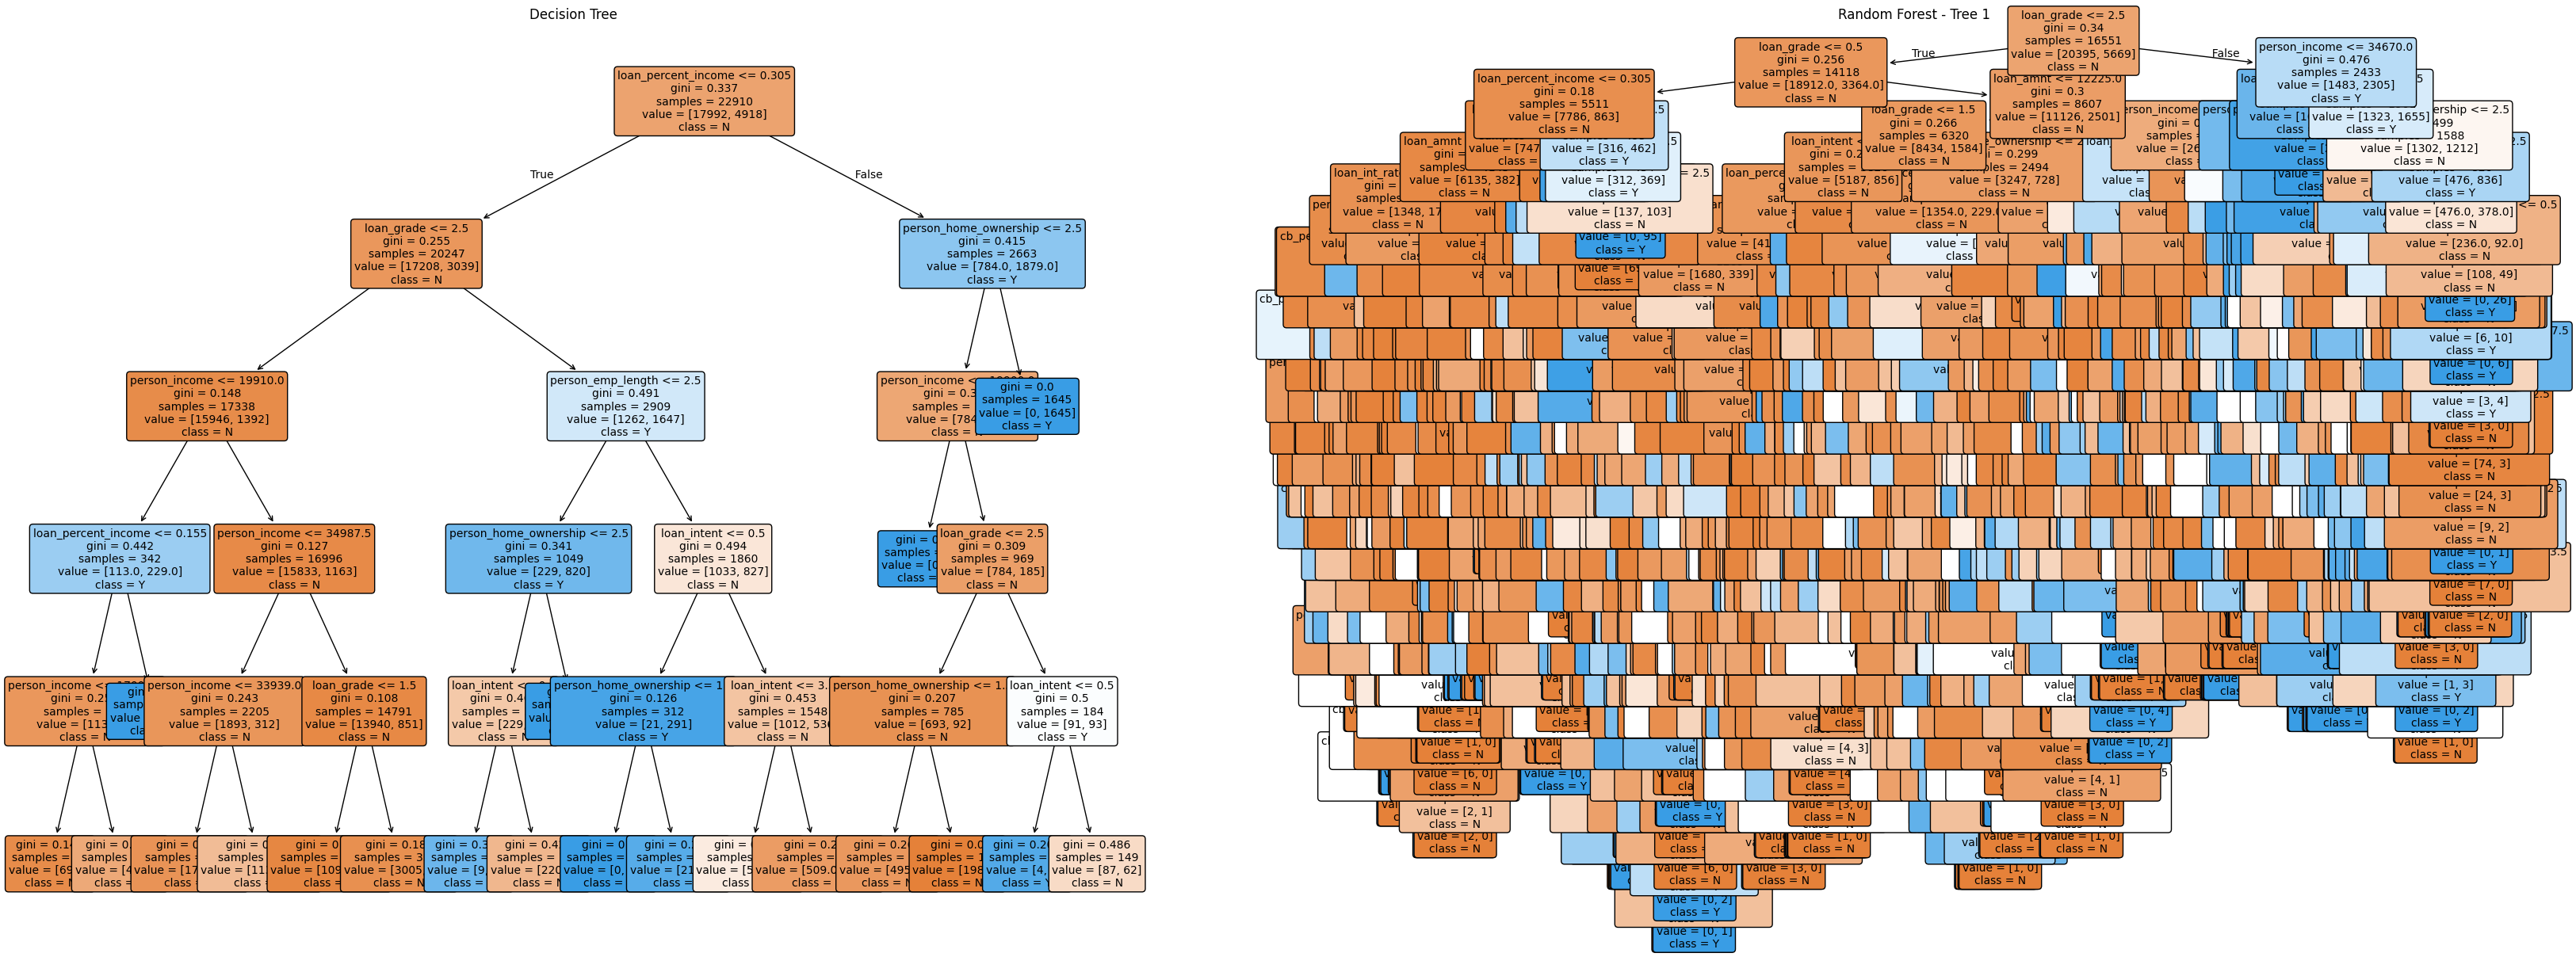

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40,15))

plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=le.classes_, rounded=True, fontsize=10, ax=axes[0])
axes[0].set_title("Decision Tree")

plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=le.classes_, rounded=True, fontsize=10, ax=axes[1])
axes[1].set_title("Random Forest - Tree 1")

plt.show()
